In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Parameters
num_features = 2  # Number of features (input dimensions)
noise_std = 0.1   # Standard deviation of noise
num_samples = 10000 # Number of samples
epochs = 100     # Number of training epochs
print_every = epochs // 10  # How often to print the loss
learning_rate = 0.01  # Learning rate for the optimizer
test_size = 0.2   # Proportion of data to use for testing

In [21]:
# Randomly generate coefficients a and intercept b
a = np.random.uniform(-5, 5, num_features)  # Random coefficients for each feature
b = np.random.uniform(-5, 5)                # Random intercept

In [22]:
# Create a random dataset with multiple features: y = a1*x1 + a2*x2 + ... + an*xn + b + e
X_data = np.random.uniform(-10, 10, (num_samples, num_features))  # Random features in the range [-10, 10]
e = np.random.normal(0, noise_std, num_samples)  # Add noise
Y_data = np.dot(X_data, a) + b + e  # y = a1*x1 + a2*x2 + ... + an*xn + b + e

In [23]:
# Manually split the dataset into train and test sets
indices = np.random.permutation(num_samples)  # Randomly permute the indices
test_set_size = int(test_size * num_samples)  # Calculate test set size
train_indices = indices[test_set_size:]      # Indices for training set
test_indices = indices[:test_set_size]       # Indices for test set

# Split data into train and test based on the indices
X_train = torch.tensor(X_data[train_indices], dtype=torch.float32)
Y_train = torch.tensor(Y_data[train_indices], dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_data[test_indices], dtype=torch.float32)
Y_test = torch.tensor(Y_data[test_indices], dtype=torch.float32).view(-1, 1)

In [24]:
# Define a neural network with multiple layers
class MultiLayerNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MultiLayerNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)  # First hidden layer
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)  # Second hidden layer
        self.layer3 = nn.Linear(hidden_dim, output_dim)  # Output layer
        self.relu = nn.ReLU()  # ReLU activation

    def forward(self, x):
        x = self.relu(self.layer1(x))  # Apply first layer and ReLU
        x = self.relu(self.layer2(x))  # Apply second layer and ReLU
        return self.layer3(x)  # Output layer (no activation)

In [25]:
# Initialize the model, loss function, and optimizer
model = MultiLayerNN(input_dim=num_features, hidden_dim=64, output_dim=1)
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # Adam optimizer

In [26]:
# Track training and validation losses
train_losses = []
val_losses = []

# Training loop
for epoch in range(epochs):
    model.train()

    # Forward pass for training
    predictions_train = model(X_train)
    train_loss = criterion(predictions_train, Y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # Validation phase (no backpropagation)
    model.eval()
    with torch.no_grad():
        predictions_val = model(X_test)
        val_loss = criterion(predictions_val, Y_test)

    # Store the losses for visualization
    train_losses.append(train_loss.item())
    val_losses.append(val_loss.item())

    # Print loss every n epochs
    if (epoch + 1) % print_every == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {train_loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")

Epoch [10/100], Training Loss: 9.9448, Validation Loss: 9.5667
Epoch [20/100], Training Loss: 3.0507, Validation Loss: 2.6814
Epoch [30/100], Training Loss: 0.8198, Validation Loss: 0.7913
Epoch [40/100], Training Loss: 0.3470, Validation Loss: 0.2840
Epoch [50/100], Training Loss: 0.1897, Validation Loss: 0.1525
Epoch [60/100], Training Loss: 0.0951, Validation Loss: 0.0830
Epoch [70/100], Training Loss: 0.0617, Validation Loss: 0.0616
Epoch [80/100], Training Loss: 0.0528, Validation Loss: 0.0532
Epoch [90/100], Training Loss: 0.0448, Validation Loss: 0.0434
Epoch [100/100], Training Loss: 0.0377, Validation Loss: 0.0372


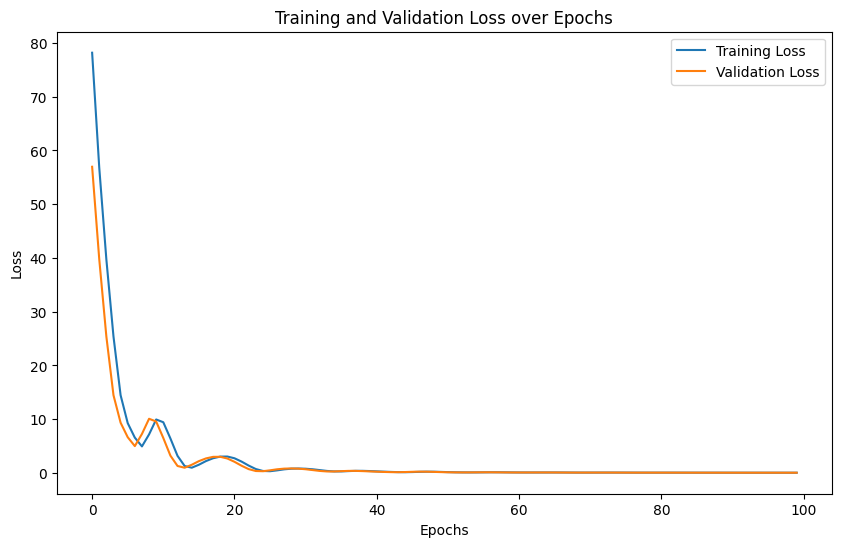

In [27]:
# Visualize the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.plot(range(epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [30]:
# Testing the model
model.eval()
with torch.no_grad():
    test_predictions = model(X_test)
    test_loss = criterion(test_predictions, Y_test)

print(f"Test Loss (MSE): {test_loss.item():.4f}")

Test Loss (MSE): 0.0372
